In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [37]:
recipes = pd.read_csv(r"C:\Users\vikas\Music\Tekworks\ml_project\data\recipes_ingredients.csv")
inventory = pd.read_csv(r"C:\Users\vikas\Music\Tekworks\ml_project\data\grocery_inventory.csv")
recipes.head()

,id,name,description,ingredients,ingredients_raw,steps,servings,serving_size,tags
0,71247,Cherry Streusel Cobbler,"I haven't made this in years, so I'm just gues...","[""cherry pie filling"", ""condensed milk"", ""melt...","[""2 (21 ounce) cans cherry pie filling"",""2...","[""Preheat oven to 375°F."", ""Spread cherry pie ...",6.0,1 (347 g),"[""60-minutes-or-less"", ""time-to-make"", ""course..."
1,76133,Reuben and Swiss Casserole Bake,I think this is even better than a reuben sand...,"[""corned beef chopped"", ""sauerkraut cold water...","[""1/2-1 lb corned beef, cooked and choppe...","[""Set oven to 350 degrees F."", ""Butter a 9 x 1...",4.0,1 (207 g),"[""60-minutes-or-less"", ""time-to-make"", ""course..."
2,503816,Yam-Pecan Recipe,A lady I work with heard me taking about ZWT a...,"[""unsalted butter"", ""vegetable oil"", ""all - pu...","[""3/4 cup unsalted butter, at room tempera...","[""Preheat oven to 350°F In a mixing bowl, usi...",8.0,1 (198 g),"[""time-to-make"", ""course"", ""main-ingredient"", ..."
3,418749,Tropical Orange Layer Cake,An easy and delicious cake. Great for a summ...,"[""orange cake mix"", ""instant vanilla pudding"",...","[""1 (18 ounce) pkge.orange cake mix"",""1 (3...","[""In a large mixing bowl, combine the first 6 ...",16.0,1 (191 g),"[""60-minutes-or-less"", ""time-to-make"", ""course..."
4,392934,Safe to Eat Raw Chocolate Chip Oreo Cookie &qu...,I was searching the web for something like thi...,"[""butter"", ""brown sugar"", ""granulated sugar"", ...","[""1/2 cup butter, room temperature "",""1/2 ...","[""Cream butter and sugars together."", ""Blend i...",24.0,1 (26 g),"[""15-minutes-or-less"", ""time-to-make"", ""course..."


In [38]:
inventory.head()

,Product_Name,Catagory,Supplier_Name,Warehouse_Location,Status,Product_ID,Supplier_ID,Date_Received,Last_Order_Date,Expiration_Date,Stock_Quantity,Reorder_Level,Reorder_Quantity,Unit_Price,Sales_Volume,Inventory_Turnover_Rate,percentage
0,Bell Pepper,Fruits & Vegetables,Eimbee,20 Pennsylvania Parkway,Discontinued,29-017-6255,43-348-2450,3/1/2024,1/6/2025,1/31/2025,46,64,17,$4.60,96,55,1.96%
1,Vegetable Oil,Oils & Fats,Digitube,03643 Oakridge Lane,Backordered,79-569-8856,04-854-7165,4/1/2024,5/19/2024,6/11/2024,51,87,86,$2.00,24,83,0.91%
2,Parmesan Cheese,Dairy,BlogXS,73 Graedel Street,Discontinued,28-146-2641,82-995-0739,4/1/2024,12/21/2024,4/8/2024,38,67,66,$12.00,35,24,1.36%
3,Carrot,Fruits & Vegetables,Avaveo,44801 Myrtle Center,Discontinued,11-581-9869,22-867-3079,5/1/2024,12/12/2024,9/26/2024,51,60,98,$1.50,44,95,1.36%
4,Garlic,Fruits & Vegetables,Katz,6195 Monterey Center,Discontinued,13-202-4809,24-281-7685,5/1/2024,7/28/2024,5/20/2024,27,22,89,$7.00,91,77,2.17%


# Shape of Data

In [39]:
print("Recipes Shape:", recipes.shape)

Recipes Shape: (500471, 9)


In [40]:
print("Inventory Shape:", inventory.shape)

Inventory Shape: (990, 17)


# Column names

In [41]:
print("Recipes Columns:", recipes.columns)

Recipes Columns: Index(['id', 'name', 'description', 'ingredients', 'ingredients_raw', 'steps',
       'servings', 'serving_size', 'tags'],
      dtype='object')


In [42]:
print("Inventory Columns:", inventory.columns)

Inventory Columns: Index(['Product_Name', 'Catagory', 'Supplier_Name', 'Warehouse_Location',
       'Status', 'Product_ID', 'Supplier_ID', 'Date_Received',
       'Last_Order_Date', 'Expiration_Date', 'Stock_Quantity', 'Reorder_Level',
       'Reorder_Quantity', 'Unit_Price', 'Sales_Volume',
       'Inventory_Turnover_Rate', 'percentage'],
      dtype='object')


# Data Type

In [43]:
print(recipes.dtypes)

id                   int64
name                object
description         object
ingredients         object
ingredients_raw     object
steps               object
servings           float64
serving_size        object
tags                object
dtype: object


In [44]:
print(inventory.dtypes)

Product_Name               object
Catagory                   object
Supplier_Name              object
Warehouse_Location         object
Status                     object
Product_ID                 object
Supplier_ID                object
Date_Received              object
Last_Order_Date            object
Expiration_Date            object
Stock_Quantity              int64
Reorder_Level               int64
Reorder_Quantity            int64
Unit_Price                 object
Sales_Volume                int64
Inventory_Turnover_Rate     int64
percentage                 object
dtype: object


# Check for null values

In [45]:
print(recipes.isnull().sum())

id                    0
name                  0
description        2186
ingredients           0
ingredients_raw      35
steps                 0
servings            722
serving_size         35
tags                 35
dtype: int64


In [46]:
print(inventory.isnull().sum())

Product_Name               0
Catagory                   1
Supplier_Name              0
Warehouse_Location         0
Status                     0
Product_ID                 0
Supplier_ID                0
Date_Received              0
Last_Order_Date            0
Expiration_Date            0
Stock_Quantity             0
Reorder_Level              0
Reorder_Quantity           0
Unit_Price                 0
Sales_Volume               0
Inventory_Turnover_Rate    0
percentage                 0
dtype: int64


# For dropping null values

In [47]:
# Drop all rows where any column has null values
recipes_clean = recipes.dropna()

# Verify again
print(recipes_clean.isnull().sum())
print("Original Shape:", recipes.shape)
print("After Removing Nulls:", recipes_clean.shape)

id                 0
name               0
description        0
ingredients        0
ingredients_raw    0
steps              0
servings           0
serving_size       0
tags               0
dtype: int64
Original Shape: (500471, 9)
After Removing Nulls: (497563, 9)


In [48]:
# Drop rows with null values
inventory_clean = inventory.dropna()

# Verify again
print(inventory_clean.isnull().sum())
print("Original Shape:", inventory.shape)
print("After Removing Nulls:", inventory_clean.shape)

Product_Name               0
Catagory                   0
Supplier_Name              0
Warehouse_Location         0
Status                     0
Product_ID                 0
Supplier_ID                0
Date_Received              0
Last_Order_Date            0
Expiration_Date            0
Stock_Quantity             0
Reorder_Level              0
Reorder_Quantity           0
Unit_Price                 0
Sales_Volume               0
Inventory_Turnover_Rate    0
percentage                 0
dtype: int64
Original Shape: (990, 17)
After Removing Nulls: (989, 17)


# Duplicates

In [49]:
print("Duplicates in recipes:", recipes_clean.duplicated().sum())
print("Duplicates in inventory:", inventory_clean.duplicated().sum())

recipes_clean = recipes_clean.drop_duplicates()
inventory_clean = inventory_clean.drop_duplicates()

Duplicates in recipes: 0
Duplicates in inventory: 0


In [50]:
# Save cleaned datasets
recipes_clean.to_csv("recipes_ingredients_clean.csv", index=False)
inventory_clean.to_csv("grocery_inventory_clean.csv", index=False)

In [51]:
print(recipes_clean.shape)
print(inventory_clean.shape)
print(recipes_clean.info())
print(inventory_clean.info())

(497563, 9)
(989, 17)
<class 'pandas.core.frame.DataFrame'>
Index: 497563 entries, 0 to 500470
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               497563 non-null  int64  
 1   name             497563 non-null  object 
 2   description      497563 non-null  object 
 3   ingredients      497563 non-null  object 
 4   ingredients_raw  497563 non-null  object 
 5   steps            497563 non-null  object 
 6   servings         497563 non-null  float64
 7   serving_size     497563 non-null  object 
 8   tags             497563 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 38.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 989 entries, 0 to 989
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Product_Name             989 non-null    object
 1   Catagory                

# Handle duplicates

In [52]:
print("Recipes duplicates:", recipes_clean.duplicated().sum())
print("Inventory duplicates:", inventory_clean.duplicated().sum())

recipes_clean = recipes_clean.drop_duplicates()
inventory_clean = inventory_clean.drop_duplicates()

Recipes duplicates: 0
Inventory duplicates: 0


# Data Type conversion

In [53]:
inventory_clean["Date_Received"] = pd.to_datetime(inventory_clean["Date_Received"])
inventory_clean["Last_Order_Date"] = pd.to_datetime(inventory_clean["Last_Order_Date"])
inventory_clean["Expiration_Date"] = pd.to_datetime(inventory_clean["Expiration_Date"])

# Convert unit price ($xx.xx) → float
inventory_clean["Unit_Price"] = inventory_clean["Unit_Price"].str.replace("$", "").astype(float)

# Convert percentage (xx%) → float
inventory_clean["percentage"] = inventory_clean["percentage"].str.replace("%", "").astype(float)

In [54]:
print(recipes_clean.describe(include="all"))
print(inventory_clean.describe(include="all"))

                   id          name description ingredients  \
count   497563.000000        497563      497563      497563   
unique            NaN        410156      470993      483571   
top               NaN  Banana Bread           .          []   
freq              NaN           190         443        7806   
mean    272699.943866           NaN         NaN         NaN   
std     155493.967345           NaN         NaN         NaN   
min         38.000000           NaN         NaN         NaN   
25%     138126.500000           NaN         NaN         NaN   
50%     271827.000000           NaN         NaN         NaN   
75%     407121.500000           NaN         NaN         NaN   
max     543736.000000           NaN         NaN         NaN   

                                ingredients_raw  \
count                                    497563   
unique                                   488710   
top     ["1   cup    water","1   cup    water"]   
freq                                   

# Numerical distributions

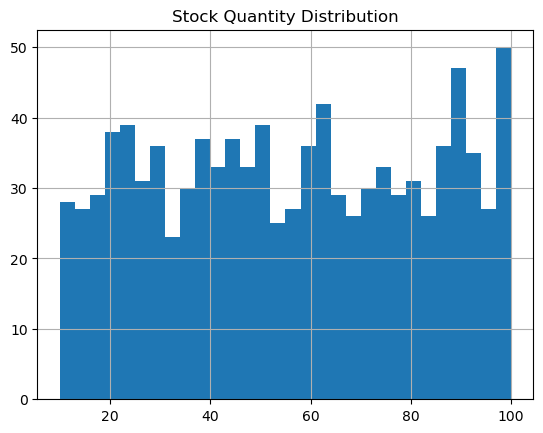

In [55]:
inventory_clean["Stock_Quantity"].hist(bins=30)
plt.title("Stock Quantity Distribution")
plt.show()

# Correlation heatmap (only numeric columns)

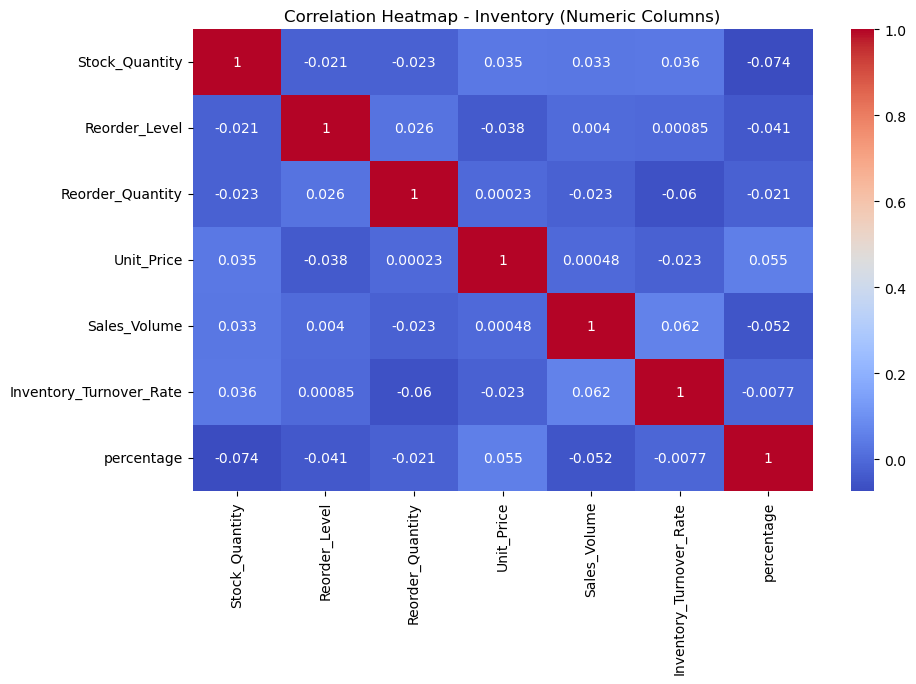

In [56]:
# Select only numeric columns
numeric_inventory = inventory_clean.select_dtypes(include=['int64', 'float64'])

# Correlation heatmap for numeric features only
plt.figure(figsize=(10,6))
sns.heatmap(numeric_inventory.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap - Inventory (Numeric Columns)")
plt.show()


# Dataset EDA

Inventory Shape: (989, 17)
Recipes Shape: (497563, 9)

Inventory Columns: ['Product_Name', 'Catagory', 'Supplier_Name', 'Warehouse_Location', 'Status', 'Product_ID', 'Supplier_ID', 'Date_Received', 'Last_Order_Date', 'Expiration_Date', 'Stock_Quantity', 'Reorder_Level', 'Reorder_Quantity', 'Unit_Price', 'Sales_Volume', 'Inventory_Turnover_Rate', 'percentage']
       Product_Name             Catagory Supplier_Name    Warehouse_Location  \
count           989                  989           989                   989   
unique          121                    7           350                   989   
top     Bread Flour  Fruits & Vegetables          Katz  32525 Marquette Park   
freq             19                  331            12                     1   
mean            NaN                  NaN           NaN                   NaN   
std             NaN                  NaN           NaN                   NaN   
min             NaN                  NaN           NaN                   NaN  

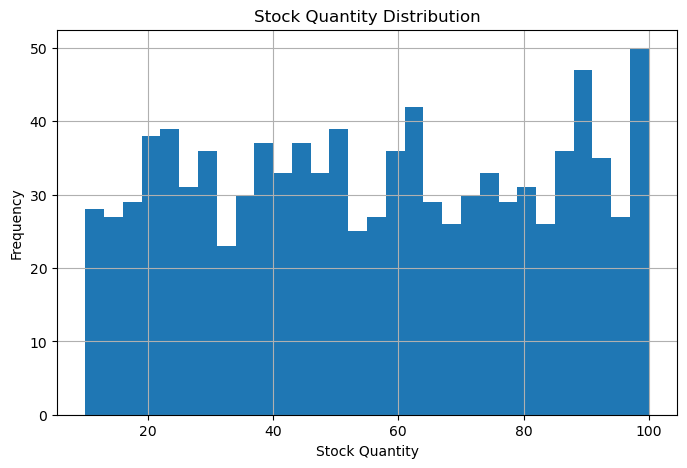

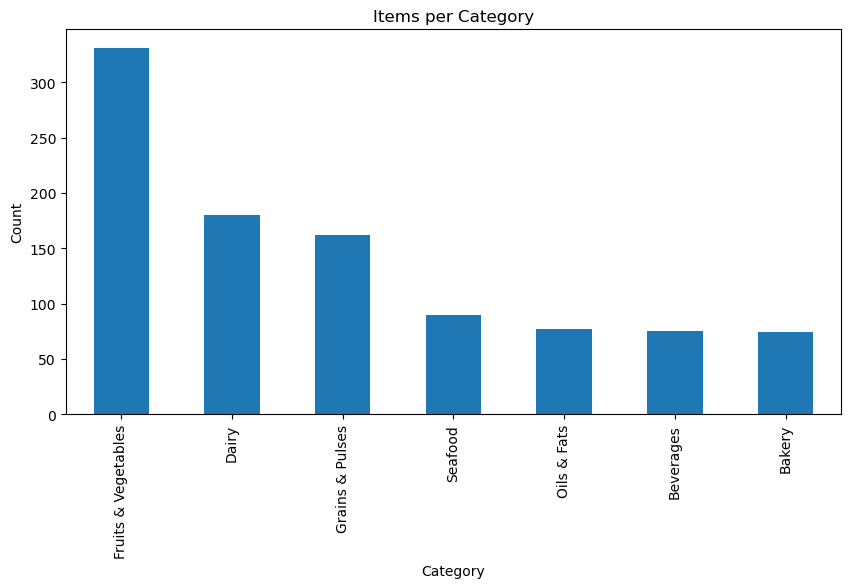


Low Stock Items:
 Empty DataFrame
Columns: [Product_Name, Stock_Quantity]
Index: []

Recipe Dataset Columns: ['id', 'name', 'description', 'ingredients', 'ingredients_raw', 'steps', 'servings', 'serving_size', 'tags']
                   id          name description ingredients  \
count   497563.000000        497563      497563      497563   
unique            NaN        410156      470993      483571   
top               NaN  Banana Bread           .          []   
freq              NaN           190         443        7806   
mean    272699.943866           NaN         NaN         NaN   
std     155493.967345           NaN         NaN         NaN   
min         38.000000           NaN         NaN         NaN   
25%     138126.500000           NaN         NaN         NaN   
50%     271827.000000           NaN         NaN         NaN   
75%     407121.500000           NaN         NaN         NaN   
max     543736.000000           NaN         NaN         NaN   

                        

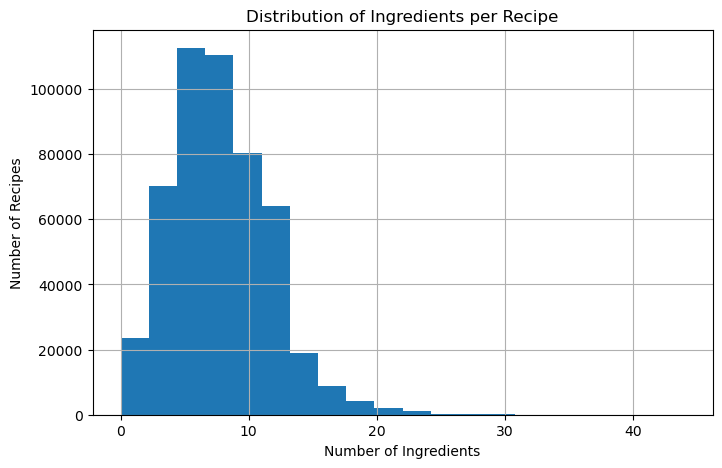

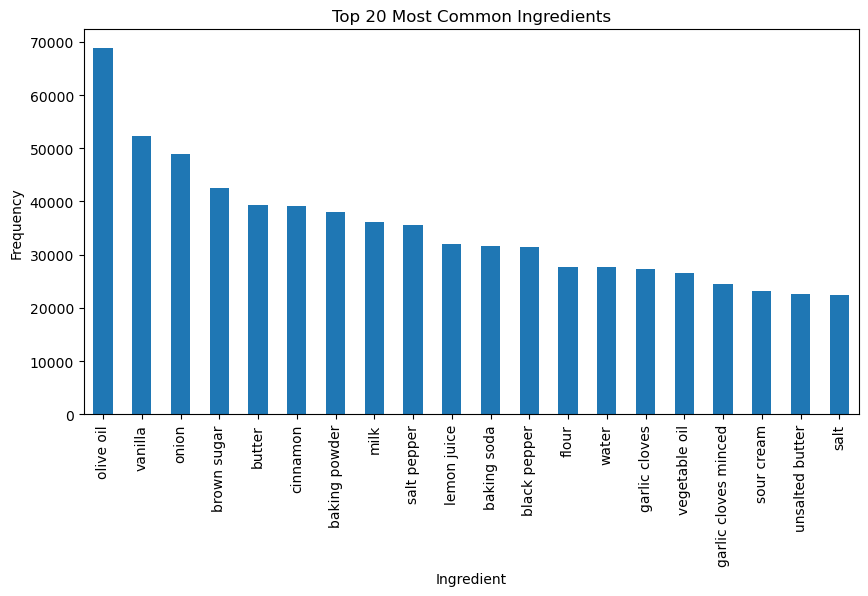

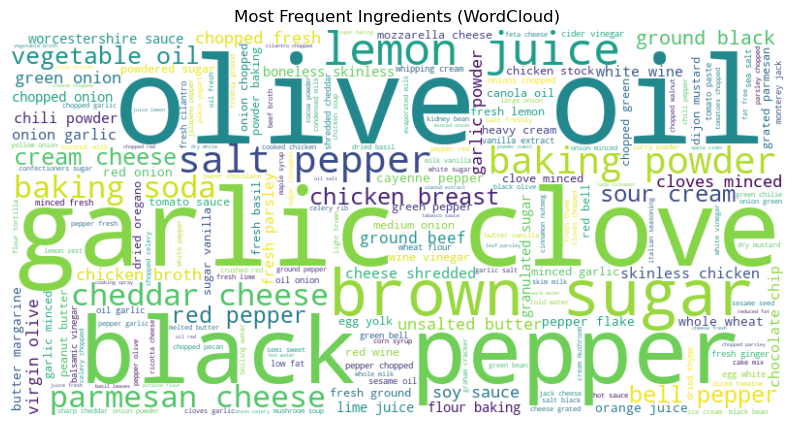


Ingredients available in inventory: ['garlic', 'papaya', 'milk', 'cheese', 'whole wheat bread', 'peas', 'herbal tea', 'green beans', 'coconut', 'raw sugar', 'butter biscuit', 'long grain rice', 'bread flour', 'wild rice', 'eggplant', 'sardines', 'sourdough bread', 'cream', 'whole wheat flour', 'onion'] ...

Missing ingredients: ['gebhard  s chili beans', 'orange - flavored liqueur marnier', '', 'real sugar splenda sugar', 'peach yogurt dannon lite', 'frozen snow peas fresh snow pea', 'whole wheat rotini harvest flax omega multigrain gluten free rotini', 'honey raspberry preserves', 'grated cheese cheddar cheese colby monterey jack cheese', 'powdered sugar sweet whipped cream', 'baby english spinach leaves', 'roasted coconut', 'dryed chili flakes', 'italian bread day old bread french bread day - old bread', 'condensed chicken white wild rice soup cream chicken soup', 'grated kraft velveeta queso blanco cheese', 'agar - agar', 'straw mushrooms', 'sashimi tuna', 'cambell fiesta nacho che

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import ast

# ------------------------
# Load Datasets
# ------------------------
inventory = pd.read_csv(r"C:\Users\vikas\Music\Tekworks\ml_project\data\notebooks\grocery_inventory_clean.csv")
recipes = pd.read_csv(r"C:\Users\vikas\Music\Tekworks\ml_project\data\notebooks\recipes_ingredients_clean.csv")

print("Inventory Shape:", inventory.shape)
print("Recipes Shape:", recipes.shape)

# ------------------------
# EDA on Inventory Dataset
# ------------------------
print("\nInventory Columns:", inventory.columns.tolist())
print(inventory.describe(include="all"))

# 1. Stock Quantity distribution
plt.figure(figsize=(8,5))
inventory["Stock_Quantity"].hist(bins=30)
plt.title("Stock Quantity Distribution")
plt.xlabel("Stock Quantity")
plt.ylabel("Frequency")
plt.show()

# 2. Items by Catagory (note: typo in column)
if "Catagory" in inventory.columns:
    plt.figure(figsize=(10,5))
    inventory["Catagory"].value_counts().plot(kind="bar")
    plt.title("Items per Category")
    plt.xlabel("Category")
    plt.ylabel("Count")
    plt.show()

# 3. Low Stock Alerts (less than 5 units)
low_stock = inventory[inventory["Stock_Quantity"] < 5]
print("\nLow Stock Items:\n", low_stock[["Product_Name", "Stock_Quantity"]])

# ------------------------
# EDA on Recipe Ingredients Dataset
# ------------------------
print("\nRecipe Dataset Columns:", recipes.columns.tolist())
print(recipes.describe(include="all"))

# Convert ingredients column (stringified list) into Python lists
def parse_ingredients(x):
    try:
        return ast.literal_eval(x) if isinstance(x, str) and x.startswith("[") else str(x).split(",")
    except:
        return str(x).split(",")

recipes["ingredients_parsed"] = recipes["ingredients"].apply(parse_ingredients)

# 1. Recipe length distribution (number of ingredients per recipe)
recipe_counts = recipes["ingredients_parsed"].apply(len)
plt.figure(figsize=(8,5))
recipe_counts.hist(bins=20)
plt.title("Distribution of Ingredients per Recipe")
plt.xlabel("Number of Ingredients")
plt.ylabel("Number of Recipes")
plt.show()

# 2. Most common ingredients
all_ingredients = [i.strip().lower() for sublist in recipes["ingredients_parsed"] for i in sublist]
ingredients_series = pd.Series(all_ingredients)
top_ingredients = ingredients_series.value_counts().head(20)

plt.figure(figsize=(10,5))
top_ingredients.plot(kind="bar")
plt.title("Top 20 Most Common Ingredients")
plt.xlabel("Ingredient")
plt.ylabel("Frequency")
plt.show()

# 3. Ingredient WordCloud
text = " ".join(all_ingredients)
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Ingredients (WordCloud)")
plt.show()

# ------------------------
# Cross-EDA: Inventory vs Recipes
# ------------------------
inventory_items = set(inventory["Product_Name"].str.lower().str.strip())
recipe_ingredients = set(all_ingredients)

# Ingredients available in inventory
available = recipe_ingredients.intersection(inventory_items)
# Missing ingredients
missing = recipe_ingredients.difference(inventory_items)

print("\nIngredients available in inventory:", list(available)[:20], "...")
print("\nMissing ingredients:", list(missing)[:20], "...")

# Which recipes are fully possible with current stock
recipe_status = {}
for idx, row in recipes.iterrows():
    ing_list = set([i.strip().lower() for i in row["ingredients_parsed"]])
    if ing_list.issubset(inventory_items):
        recipe_status[row["name"]] = "Available"
    else:
        recipe_status[row["name"]] = "Missing Ingredients"

recipes["status"] = recipes["name"].map(recipe_status)
print("\nSample Recipe Availability:\n", recipes[["name", "status"]].head(10))


In [66]:
print(recipes.columns)


Index(['id', 'name', 'description', 'ingredients', 'ingredients_raw', 'steps',
       'servings', 'serving_size', 'tags'],
      dtype='object')
